In [ ]:
import jax
import jax.numpy as jnp
import jax.random as random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

from abmax.structs import *


import seaborn as sns
sns.set_theme(style="darkgrid")
palette = "viridis"
sns.set_palette(palette)

MAX_SPAWN_X = 100.0 # max x in spawning arena
MAX_SPAWN_Y = MAX_SPAWN_X # max y in spawning arena
FORAGER_RADIUS = 5.0
EP_LEN = 10000
NUM_FORAGERS = 2

In [21]:
def plot_approach_time(RENDER_DATA_PATH_clamped, RENDER_DATA_PATH_unclamped, figname):
    # load the mean nearest neighbor distance data
    mean_nn_dist_clamped = jnp.load(RENDER_DATA_PATH_clamped + 'rendering_forager_avg_NN_dists.npy')
    mean_nn_dist_unclamped = jnp.load(RENDER_DATA_PATH_unclamped + 'rendering_forager_avg_NN_dists.npy')

    #time of approach is marked by begin->When NN distance goes below 38, end->whenn NN distance first reaches 10
    def calculateapproach_time(mean_nn_dist):
        begin = -1
        end = -1
        for i in range(len(mean_nn_dist)):
            if mean_nn_dist[i] < 38 and begin == -1:
                begin = i
            if mean_nn_dist[i] < 10 and begin != -1:
                end = i
                break
        return begin, end


    #std deviation
    dev_nn_dist_clamped = jnp.std(mean_nn_dist_clamped, axis=0)
    dev_nn_dist_unclamped = jnp.std(mean_nn_dist_unclamped, axis=0)
    mean_nn_dist_clamped = jnp.mean(mean_nn_dist_clamped, axis=0)
    mean_nn_dist_unclamped = jnp.mean(mean_nn_dist_unclamped, axis=0)
    approach_time_clamped = calculateapproach_time(mean_nn_dist_clamped)
    approach_time_unclamped = calculateapproach_time(mean_nn_dist_unclamped)
    mean_nn_dist_clamped_c = jnp.convolve(mean_nn_dist_clamped, jnp.ones(50)/50, mode='valid')
    mean_nn_dist_unclamped_c = jnp.convolve(mean_nn_dist_unclamped, jnp.ones(50)/50, mode='valid')

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_xlabel('Timestep', fontsize=15)
    ax.set_ylabel('Inter-forager distance', fontsize=15)
    ax.set_xticks(jnp.arange(0, 10000, 2000))

    ax.plot(mean_nn_dist_unclamped_c, label='unclamped', color='blue')
    ax.fill_between(jnp.arange(len(mean_nn_dist_unclamped)), mean_nn_dist_unclamped - dev_nn_dist_unclamped, mean_nn_dist_unclamped + dev_nn_dist_unclamped, color='blue', alpha=0.2)
    if approach_time_unclamped[1] != -1:
        ax.axvline(x=approach_time_unclamped[1], color='black', linestyle=':')
    
    ax.plot(mean_nn_dist_clamped_c, label='clamped', color='green')
    ax.fill_between(jnp.arange(len(mean_nn_dist_clamped)), mean_nn_dist_clamped - dev_nn_dist_clamped, mean_nn_dist_clamped + dev_nn_dist_clamped, color='green', alpha=0.2)
    if approach_time_clamped[1] != -1:
        ax.axvline(x=approach_time_clamped[1], color='black', linestyle=':')
    ax.legend(loc='upper right', fontsize=18)
    plt.savefig(figname, bbox_inches='tight')
    plt.show()

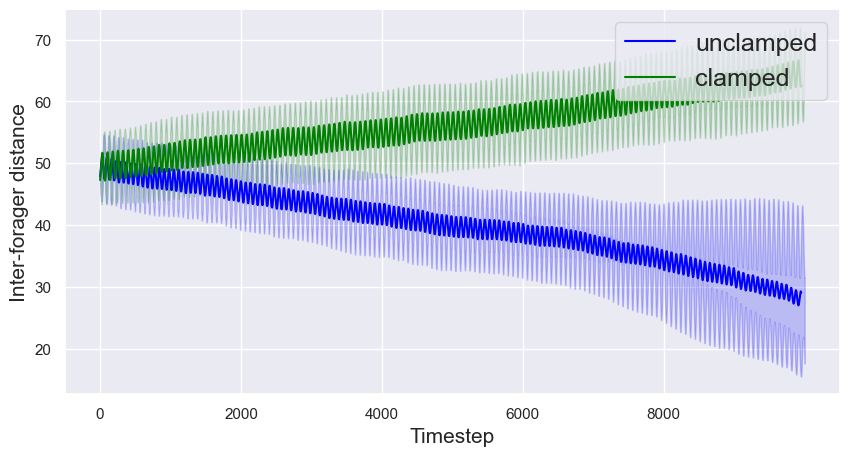

In [27]:
RENDER_DATA_PATH_clamped = "./trajectories_s_7/e_35/clamped/"
RENDER_DATA_PATH_unclamped = "./trajectories_s_7/e_35/unclamped/"
figname = "./figs/approach_time_s_7_e_35.png"
plot_approach_time(RENDER_DATA_PATH_clamped, RENDER_DATA_PATH_unclamped, figname)

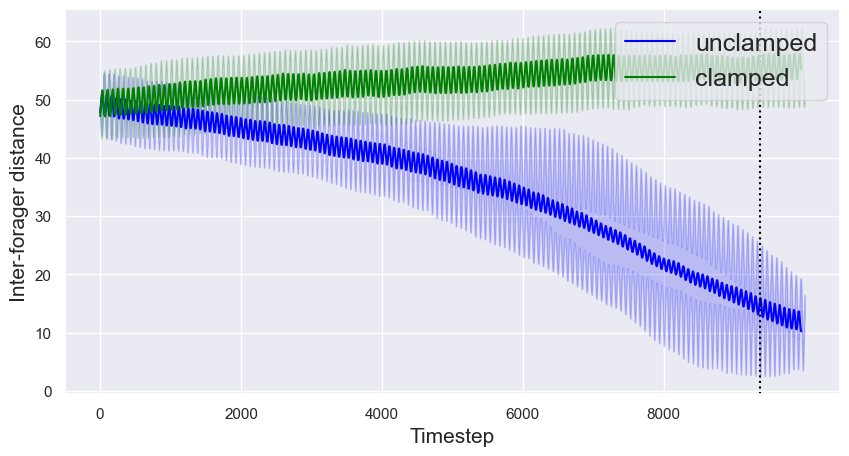

In [28]:
RENDER_DATA_PATH_clamped = "./trajectories_s_7/e_30/clamped/"
RENDER_DATA_PATH_unclamped = "./trajectories_s_7/e_30/unclamped/"
figname = "./figs/approach_time_s_7_e_30.png"
plot_approach_time(RENDER_DATA_PATH_clamped, RENDER_DATA_PATH_unclamped, figname)

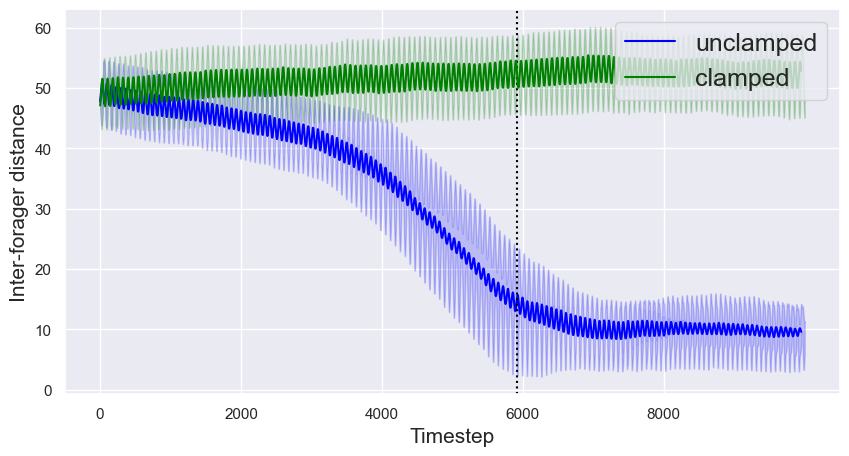

In [29]:
RENDER_DATA_PATH_clamped = "./trajectories_s_7/e_25/clamped/"
RENDER_DATA_PATH_unclamped = "./trajectories_s_7/e_25/unclamped/"
figname = "./figs/approach_time_s_7_e_25.png"
plot_approach_time(RENDER_DATA_PATH_clamped, RENDER_DATA_PATH_unclamped, figname)

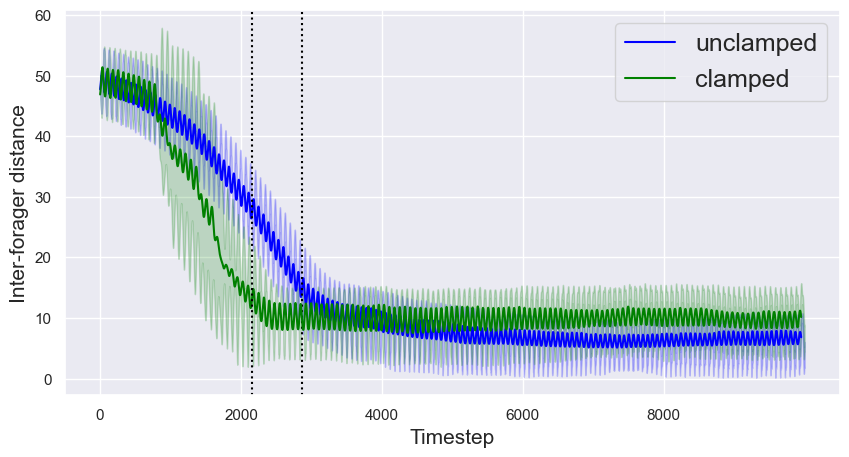

In [30]:
RENDER_DATA_PATH_clamped = "./trajectories_s_7/e_20/clamped/"
RENDER_DATA_PATH_unclamped = "./trajectories_s_7/e_20/unclamped/"
figname = "./figs/approach_time_s_7_e_20.png"
plot_approach_time(RENDER_DATA_PATH_clamped, RENDER_DATA_PATH_unclamped, figname)

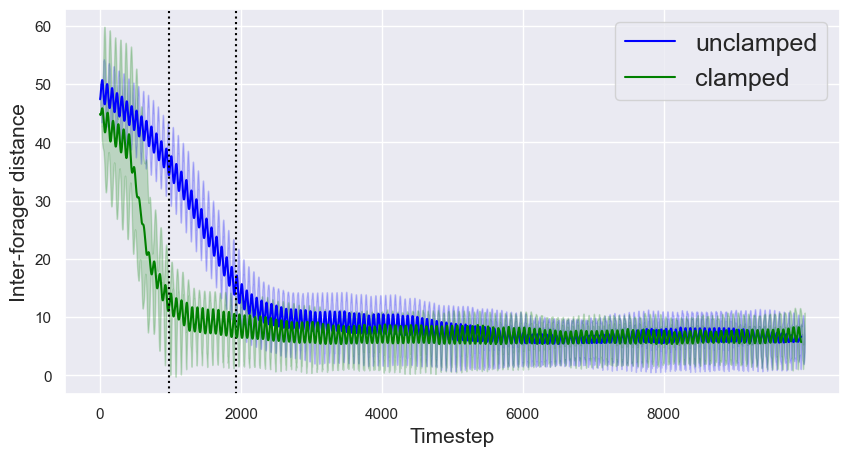

In [31]:
RENDER_DATA_PATH_clamped = "./trajectories_s_7/e_15/clamped/"
RENDER_DATA_PATH_unclamped = "./trajectories_s_7/e_15/unclamped/"
figname = "./figs/approach_time_s_7_e_15.png"
plot_approach_time(RENDER_DATA_PATH_clamped, RENDER_DATA_PATH_unclamped, figname)

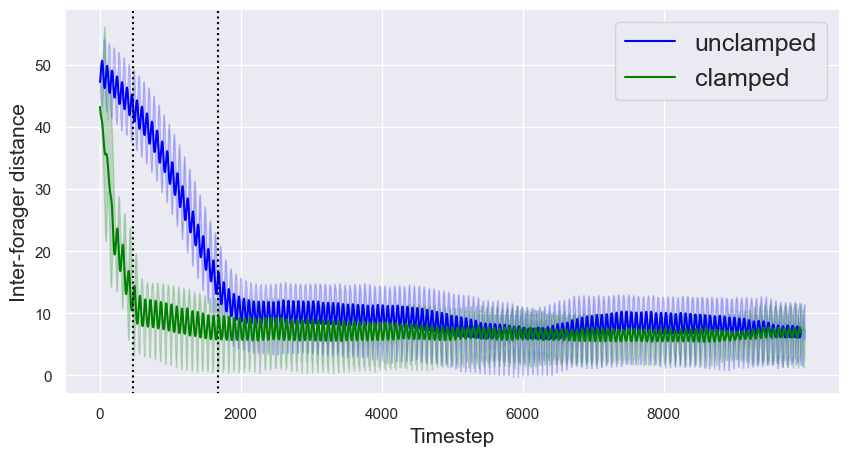

In [32]:
RENDER_DATA_PATH_clamped = "./trajectories_s_7/e_10/clamped/"
RENDER_DATA_PATH_unclamped = "./trajectories_s_7/e_10/unclamped/"
figname = "./figs/approach_time_s_7_e_10.png"
plot_approach_time(RENDER_DATA_PATH_clamped, RENDER_DATA_PATH_unclamped, figname)

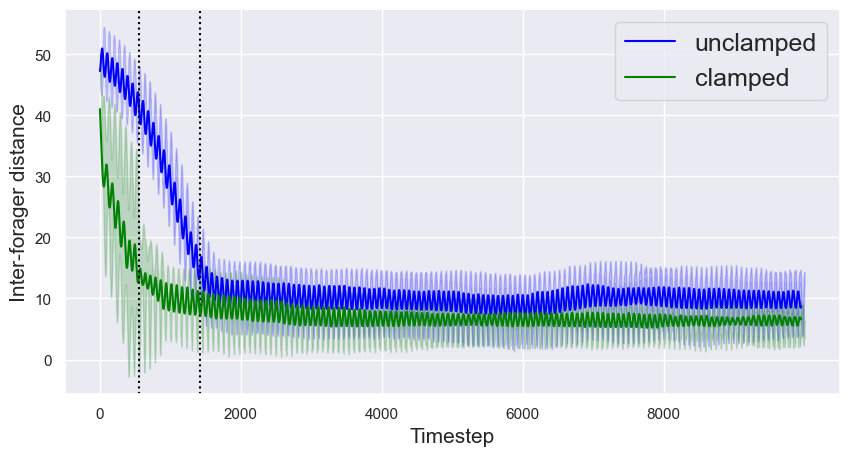

In [33]:
RENDER_DATA_PATH_clamped = "./trajectories_s_7/e_5/clamped/"
RENDER_DATA_PATH_unclamped = "./trajectories_s_7/e_5/unclamped/"
figname = "./figs/approach_time_s_7_e_5.png"
plot_approach_time(RENDER_DATA_PATH_clamped, RENDER_DATA_PATH_unclamped, figname)

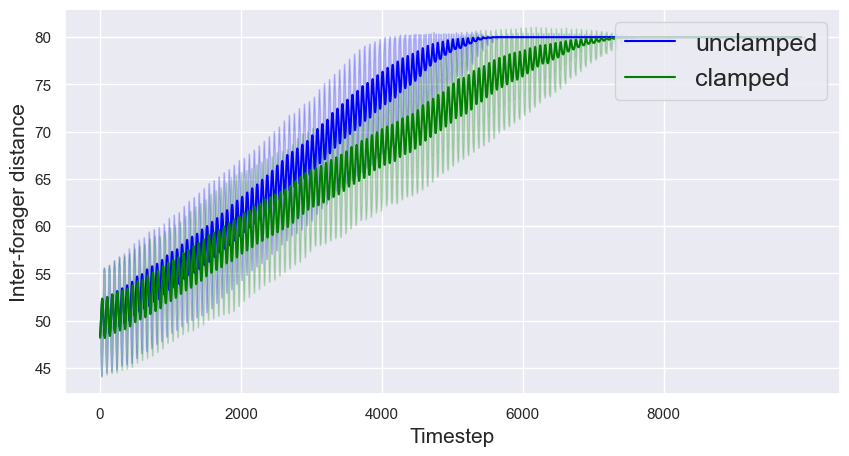

In [34]:
RENDER_DATA_PATH_clamped = "./trajectories_s_5/e_5/clamped/"
RENDER_DATA_PATH_unclamped = "./trajectories_s_5/e_5/unclamped/"
figname = "./figs/approach_time_s_5_e_5.png"
plot_approach_time(RENDER_DATA_PATH_clamped, RENDER_DATA_PATH_unclamped, figname)

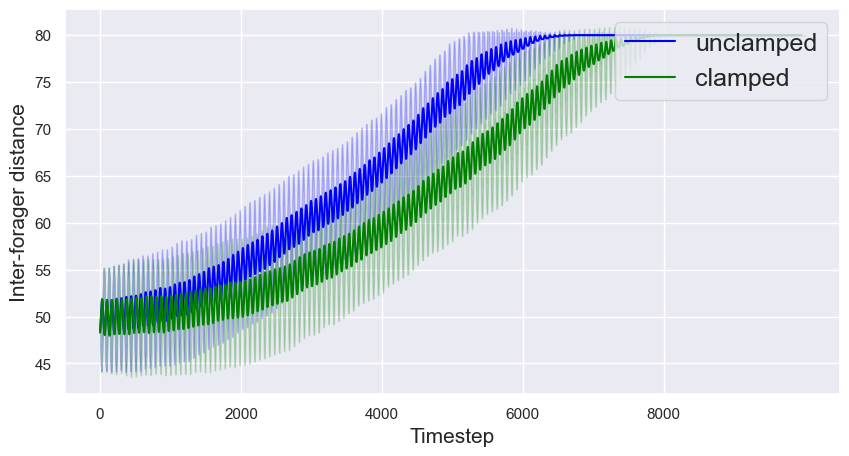

In [40]:
RENDER_DATA_PATH_clamped = "./trajectories_s_5/e_10/clamped/"
RENDER_DATA_PATH_unclamped = "./trajectories_s_5/e_10/unclamped/"
figname = "./figs/approach_time_s_5_e_10.png"
plot_approach_time(RENDER_DATA_PATH_clamped, RENDER_DATA_PATH_unclamped, figname)

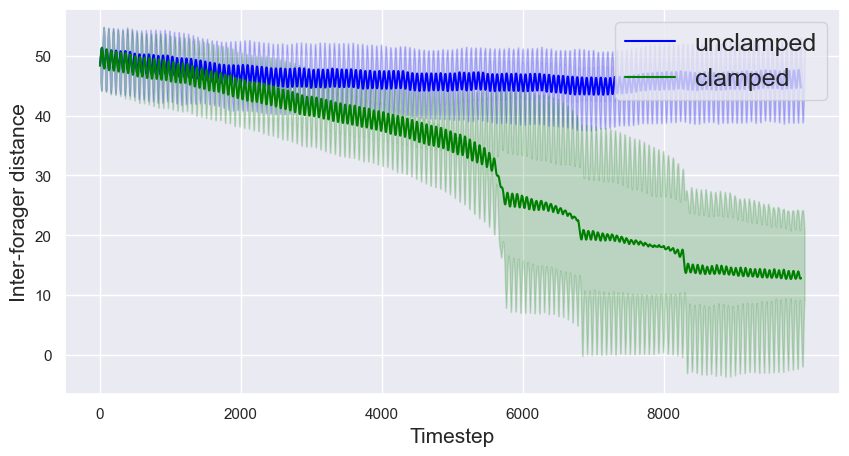

In [41]:
RENDER_DATA_PATH_clamped = "./trajectories_s_5/e_15/clamped/"
RENDER_DATA_PATH_unclamped = "./trajectories_s_5/e_15/unclamped/"
figname = "./figs/approach_time_s_5_e_15.png"
plot_approach_time(RENDER_DATA_PATH_clamped, RENDER_DATA_PATH_unclamped, figname)

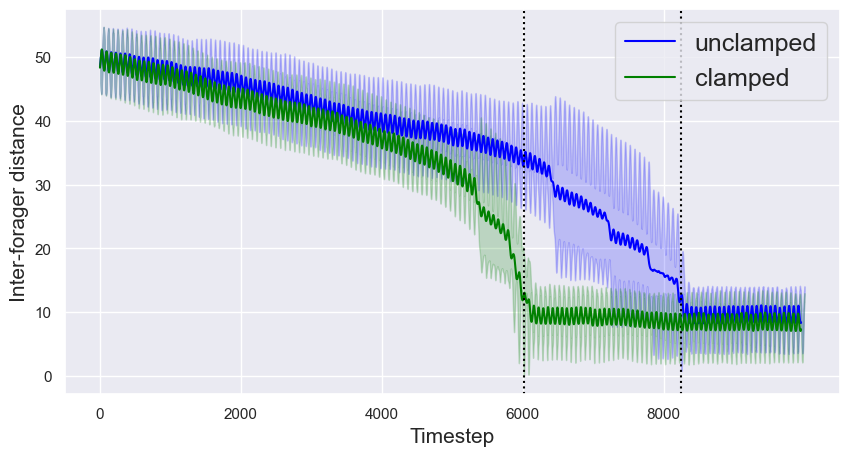

In [42]:
RENDER_DATA_PATH_clamped = "./trajectories_s_5/e_20/clamped/"
RENDER_DATA_PATH_unclamped = "./trajectories_s_5/e_20/unclamped/"
figname = "./figs/approach_time_s_5_e_20.png"
plot_approach_time(RENDER_DATA_PATH_clamped, RENDER_DATA_PATH_unclamped, figname)

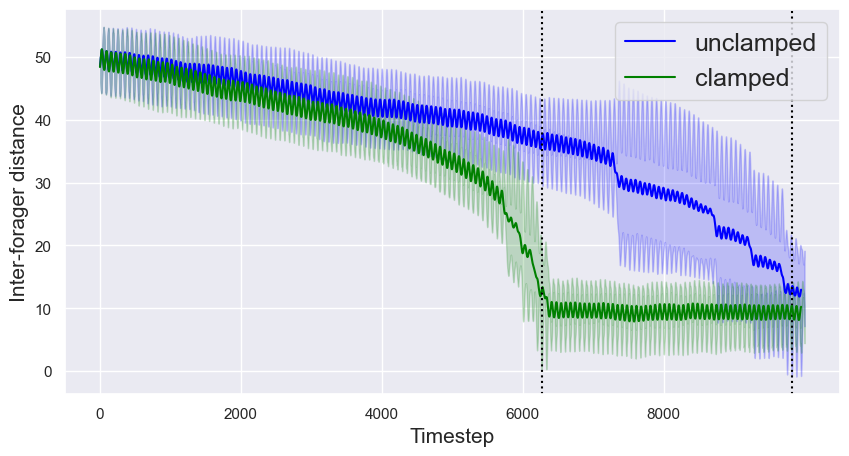

In [43]:
RENDER_DATA_PATH_clamped = "./trajectories_s_5/e_25/clamped/"
RENDER_DATA_PATH_unclamped = "./trajectories_s_5/e_25/unclamped/"
figname = "./figs/approach_time_s_5_e_25.png"
plot_approach_time(RENDER_DATA_PATH_clamped, RENDER_DATA_PATH_unclamped, figname)

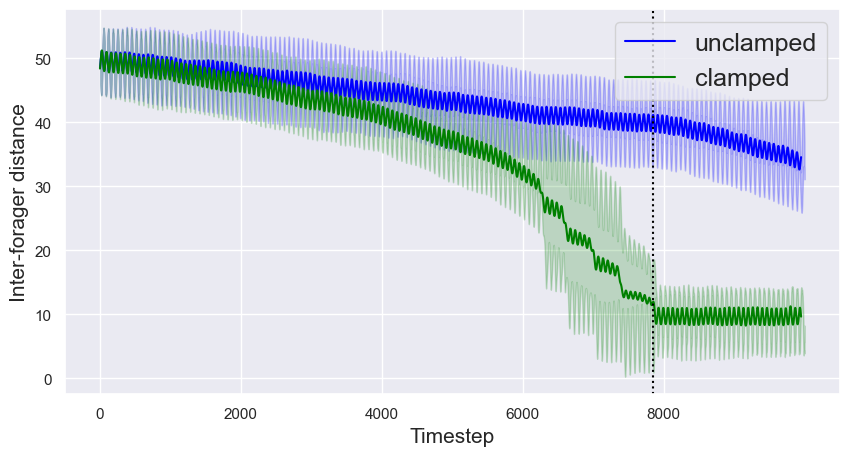

In [44]:
RENDER_DATA_PATH_clamped = "./trajectories_s_5/e_30/clamped/"
RENDER_DATA_PATH_unclamped = "./trajectories_s_5/e_30/unclamped/"
figname = "./figs/approach_time_s_5_e_30.png"
plot_approach_time(RENDER_DATA_PATH_clamped, RENDER_DATA_PATH_unclamped, figname)

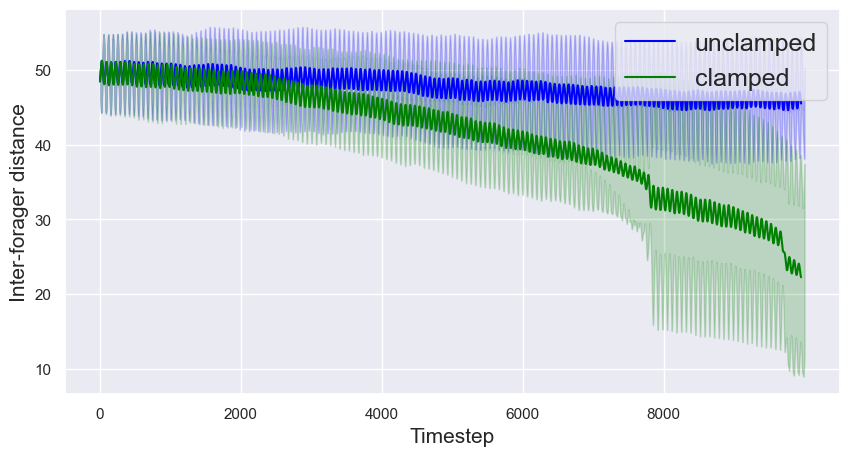

In [45]:
RENDER_DATA_PATH_clamped = "./trajectories_s_5/e_35/clamped/"
RENDER_DATA_PATH_unclamped = "./trajectories_s_5/e_35/unclamped/"
figname = "./figs/approach_time_s_5_e_35.png"
plot_approach_time(RENDER_DATA_PATH_clamped, RENDER_DATA_PATH_unclamped, figname)